
# Computational Fluid Dynamics

### Overview:

* **Name**:  Yuma Kanogi
* **Student number**:  1023334714

### Purpose:

* My major involves Computational Fluid Dynamics (CFD) and data analysis of fluid flow behavior.
* The key dependent variables (DVs) are the velocity components (u, v) and pressure (p), which describe the state of the flow field.
* The key independent variables (IVs) are the spatial coordinates (x, y), time (t), and their spatial derivatives (dudx, dudy, dvdx, dvdy) that define the flow conditions.
* The dataset contains 10,000 cases, evenly divided into 5,000 laminar and 5,000 turbulent flow samples. It includes 3 dependent variables and 7 independent variables, providing a rich basis for fluid dynamics modeling and Physics-Informed Neural Network (PINN) training.

### Dataset source:

The data can be downloaded [here](https://www.kaggle.com/datasets/allanwandia/computational-fluid-dynamics/data)

---

## Explanation

<img src="ナビエストークス.avif">

1.  Pressure vs y-acceleration (dvdt)

Shows how pressure variations drive or resist fluid acceleration.
A positive pressure gradient accelerates the flow, while a negative one decelerates it.

2. Velocity vs Pressure

Visualizes the Bernoulli relationship — higher velocity corresponds to lower pressure.
Represents energy conservation and the balance between kinetic and pressure energy.

3. Velocity vs Acceleration

Shows how acceleration responds to velocity changes, reflecting inertia and turbulence nonlinearity.
Laminar flow tends to show a linear trend, while turbulent flow exhibits greater scatter.

4. Velocity field (u–v plane)

Displays the structure of the flow field from x– and y–velocity components.
Laminar flow shows an orderly, narrow distribution; turbulent flow appears more scattered and complex.

---

## Descriptive Statistics

In [ ]:
import pandas as pd
from descriptive import plot_all
from parse_data import  display_dispersion_table, dispersion


# データ読み込み
df = pd.read_csv('flow.csv')

df = df[['t', 'u', 'v', 'p', 'dudt', 'dvdt', 'flow_type']]


**Table** Dispersion summary statistics

In [6]:
display_dispersion_table(df)

,t,u,v,p,dudt,dvdt
st.dev.,0.031800,0.372560,0.095746,2.495353,3.950692,3.334321
min,0.000000,-1.844265,-1.047295,-8.022295,-71.891981,-30.315808
max,0.100000,2.350179,0.964703,0.024720,34.206342,23.060428
range,0.100000,4.194444,2.011998,8.047015,106.098323,53.376235
25th,0.022222,0.383932,-0.003037,-3.780860,-1.089146,-0.194212
75th,0.077778,0.896031,0.003147,-0.080119,0.942486,0.163756
IQR,0.055556,0.512099,0.006184,3.700741,2.031632,0.357968


**Four types of graphs derived from the Navier–Stokes equations**

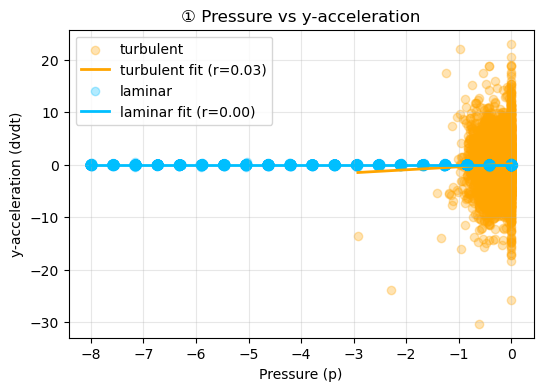

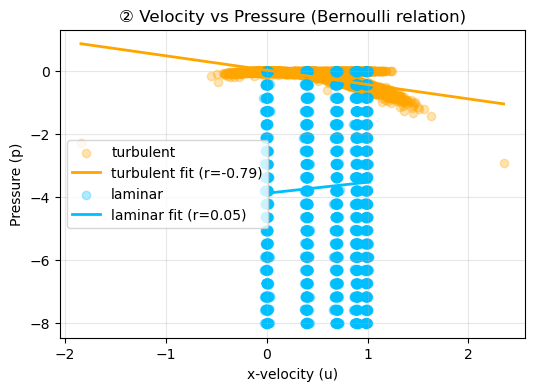

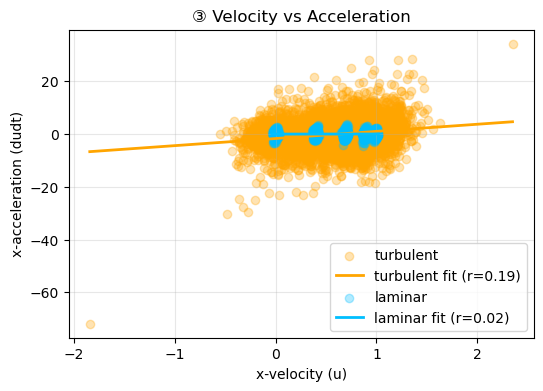

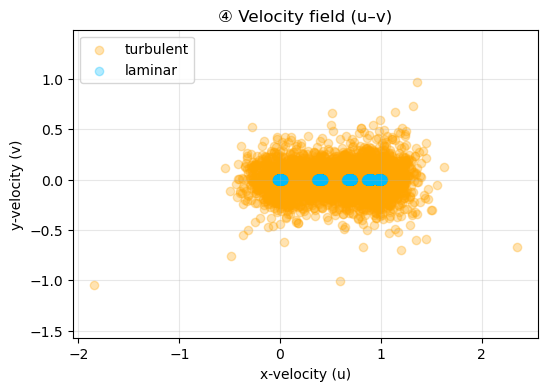

In [7]:
plot_all(df)


---

## Hypothesis Testing

===== Main Result ①：Pressure vs Acceleration (ANCOVA) =====


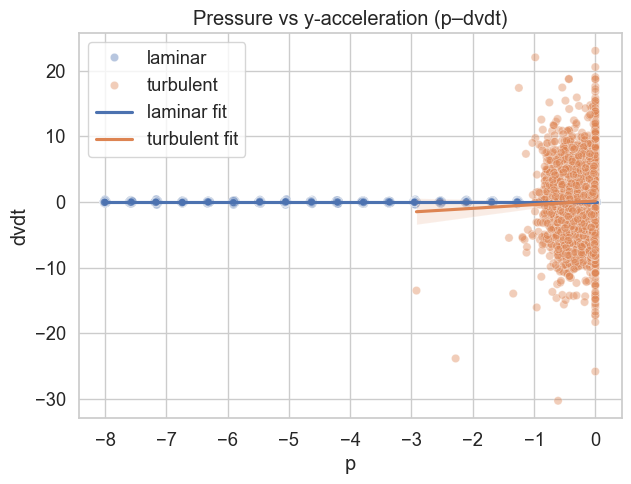

                            OLS Regression Results                            
Dep. Variable:                   dvdt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.565
Date:                Fri, 28 Nov 2025   Prob (F-statistic):             0.0528
Time:                        13:47:37   Log-Likelihood:                -26228.
No. Observations:               10000   AIC:                         5.246e+04
Df Residuals:                    9996   BIC:                         5.249e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

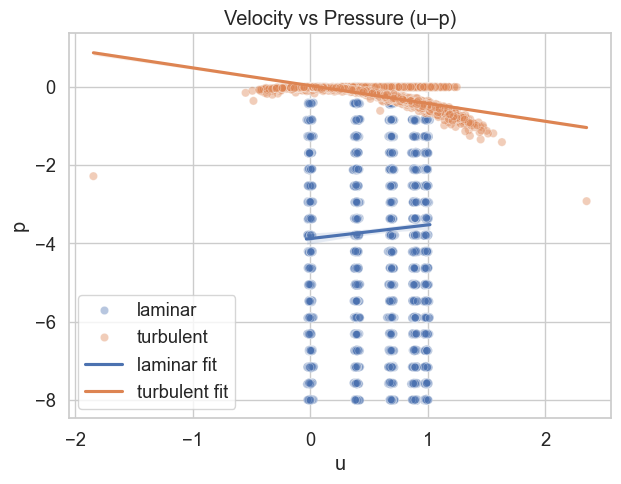

{'r_laminar': np.float64(0.04752291361699937), 'r_turbulent': np.float64(-0.7889992802179964), 'z_score': np.float64(55.799942783472105), 'p_value': np.float64(0.0)}

===== Additional Analysis：Variance of Acceleration =====
{'variance_laminar': 0.6430809975864835, 'variance_turbulent': 30.57038904399669, 'levene_statistic': np.float64(4179.66068905654), 'p_value': np.float64(0.0)}


In [3]:
from classical import (
    analysis_pressure_acceleration, 
    analysis_velocity_pressure, 
    analysis_acceleration_variance
)
import pandas as pd

# データ読み込み
df = pd.read_csv('flow.csv')

df = df[['t', 'u', 'v', 'p', 'dudt', 'dvdt', 'flow_type']]

# --- Main Result ① ---
print("===== Main Result ①：Pressure vs Acceleration (ANCOVA) =====")
result1 = analysis_pressure_acceleration(df)
print(result1)


# --- Main Result ② ---
print("\n===== Main Result ②：Velocity vs Pressure (Correlation diff) =====")
result2 = analysis_velocity_pressure(df)
print(result2)


# --- classical ①（追加分析） ---
print("\n===== Additional Analysis：Variance of Acceleration =====")
result3 = analysis_acceleration_variance(df)
print(result3)